In [57]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 17.5 MB/s eta 0:00:00


In [99]:
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

In [4]:
uploaded=files.upload()

Saving Google_Stock_Train (2010-2022).csv to Google_Stock_Train (2010-2022).csv


In [5]:
data=pd.read_csv("Google_Stock_Train (2010-2022).csv")

In [7]:
data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,15.689439,15.753504,15.621622,15.684434,15.684434,78169752
1,2010-01-05,15.695195,15.711712,15.554054,15.615365,15.615365,120067812
2,2010-01-06,15.662162,15.662162,15.174174,15.221722,15.221722,158988852
3,2010-01-07,15.250250,15.265265,14.831081,14.867367,14.867367,256315428
4,2010-01-08,14.814815,15.096346,14.742492,15.065566,15.065566,188783028


In [9]:
data.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
3267,2022-12-23,87.110001,89.550003,87.070000,89.230003,89.230003,23003000
3268,2022-12-27,88.800003,88.940002,87.010002,87.389999,87.389999,20097300
3269,2022-12-28,86.980003,88.040001,85.940002,86.019997,86.019997,19523200
3270,2022-12-29,86.620003,88.849998,86.610001,88.449997,88.449997,23333500
3271,2022-12-30,86.980003,88.300003,86.570000,88.230003,88.230003,23986300


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3272 entries, 0 to 3271
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3272 non-null   object 
 1   Open       3272 non-null   float64
 2   High       3272 non-null   float64
 3   Low        3272 non-null   float64
 4   Close      3272 non-null   float64
 5   Adj Close  3272 non-null   float64
 6   Volume     3272 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 179.1+ KB


In [11]:
data.shape

(3272, 7)

In [13]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3272.000000,3272.000000,3272.000000,3272.000000,3272.000000,3.272000e+03
mean,49.161187,49.650301,48.653316,49.160898,49.160898,6.017541e+07
std,35.810449,36.216443,35.387644,35.804094,35.804094,4.957609e+07
min,10.968719,11.068068,10.851602,10.912663,10.912663,9.312000e+06
25%,20.281718,20.426113,20.172359,20.295858,20.295858,2.894200e+07
50%,38.527750,38.931249,38.224501,38.563002,38.563002,4.123200e+07
75%,61.837625,62.265000,61.218125,61.738001,61.738001,7.927251e+07
max,151.250000,151.546494,148.899002,149.838501,149.838501,5.923990e+08


In [14]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [15]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [17]:
missing_values=data.isnull().sum()
duplicate=data.duplicated()
print(missing_values)
print(duplicate)

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
0       False
1       False
2       False
3       False
4       False
        ...  
3267    False
3268    False
3269    False
3270    False
3271    False
Length: 3272, dtype: bool


In [18]:
cleaningdataset=data.dropna(axis=1)
cleaningdataset=cleaningdataset.dropna()
cleaningdataset=data.drop_duplicates()

In [19]:
print(cleaningdataset.shape)

(3272, 7)


In [22]:
data["Date"]=pd.to_datetime(data["Date"])

In [23]:
data["Year"] = data["Date"].dt.year

In [24]:
#calculating avg highest and avg lowest stock Price per year(2020-2023)
averagehighest=data.groupby("Year")['High'].mean()
averagelowest=data.groupby("Year")['Low'].mean()

In [25]:
for year in range(2010,2022):
  avg_high=averagehighest.get(year,0)
  avg_low=averagelowest.get(year,0)
  print(avg_high,avg_low)

13.53724161111111 13.28298142063492
14.37351540079365 14.104312626984127
16.223136176 15.939817852000001
22.275741 21.96477621825397
28.642101734126985 28.167980603174602
31.28467858730159 30.69791066666667
38.47044042063492 37.84813482936508
47.260866617529885 46.66088046613546
56.74817344223108 55.46726888446215
59.985837345238096 59.062902880952386
74.83170739130435 72.98030428063241
125.25533550793651 123.03388114285714


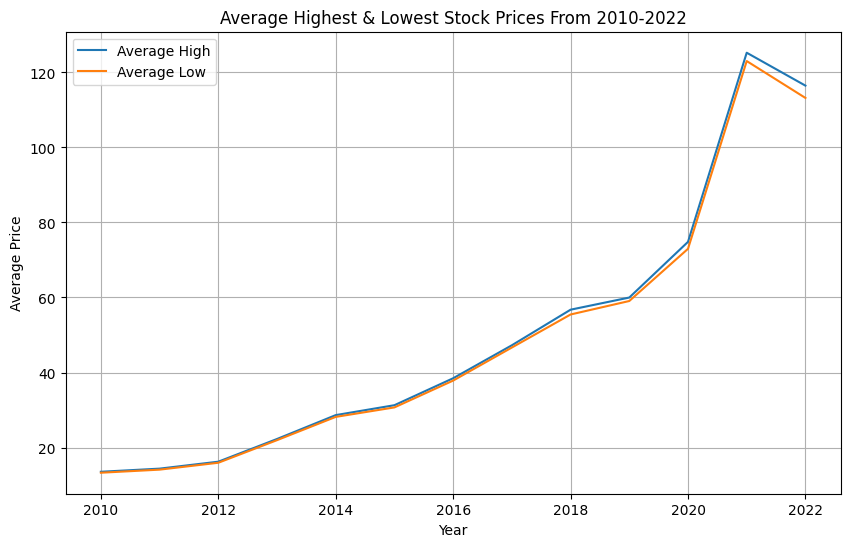

In [27]:
plt.figure(figsize=(10,6))
plt.plot(averagehighest.index,averagehighest,label="Average High")
plt.plot(averagelowest.index,averagelowest,label="Average Low")
plt.xlabel("Year")
plt.ylabel("Average Price")
plt.title("Average Highest & Lowest Stock Prices From 2010-2022")
plt.legend()
plt.grid(True)
plt.show()

In [28]:
#calculating avg volume per year(2020-2023)
annual_volume=data.groupby("Year")['Volume'].mean()


In [29]:
for year in range(2010,2022):
  vol=annual_volume.get(year,0)

  print(vol)

127069010.14285715
123005664.85714285
104070817.008
83412535.71428572
53328169.61904762
43396365.07936508
39381277.777777776
32342717.131474104
40919314.74103586
30260753.968253966
39953114.62450593
30513936.507936507


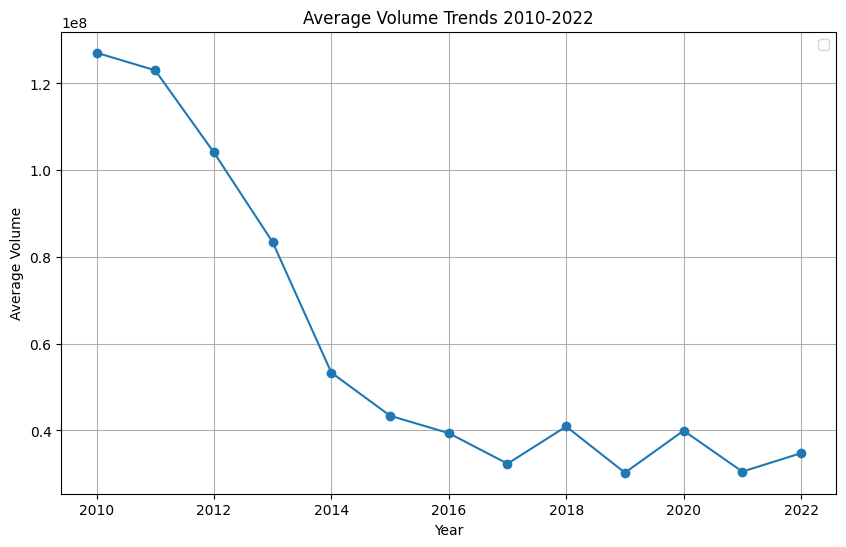

In [30]:
plt.figure(figsize=(10,6))
plt.plot(annual_volume.index,annual_volume,marker="o")

plt.xlabel("Year")
plt.ylabel("Average Volume")
plt.title("Average Volume Trends 2010-2022")
plt.legend()
plt.grid(True)
plt.show()

In [31]:
#relationship between volume and price
data["Price Change"]=data["Close"]-data["Open"]

In [32]:
price_change=data.groupby("Year")["Price Change"].mean()

In [34]:
for year in range(2010,2022):
  pricechange=price_change.get(year,0)

  print(f"Year{year}:Volume={vol:.2f},Price Change={pricechange:.2f}")

Year2010:Volume=30513936.51,Price Change=-0.02
Year2011:Volume=30513936.51,Price Change=-0.00
Year2012:Volume=30513936.51,Price Change=0.00
Year2013:Volume=30513936.51,Price Change=0.02
Year2014:Volume=30513936.51,Price Change=-0.04
Year2015:Volume=30513936.51,Price Change=-0.00
Year2016:Volume=30513936.51,Price Change=-0.02
Year2017:Volume=30513936.51,Price Change=0.02
Year2018:Volume=30513936.51,Price Change=-0.03
Year2019:Volume=30513936.51,Price Change=0.05
Year2020:Volume=30513936.51,Price Change=0.07
Year2021:Volume=30513936.51,Price Change=0.08


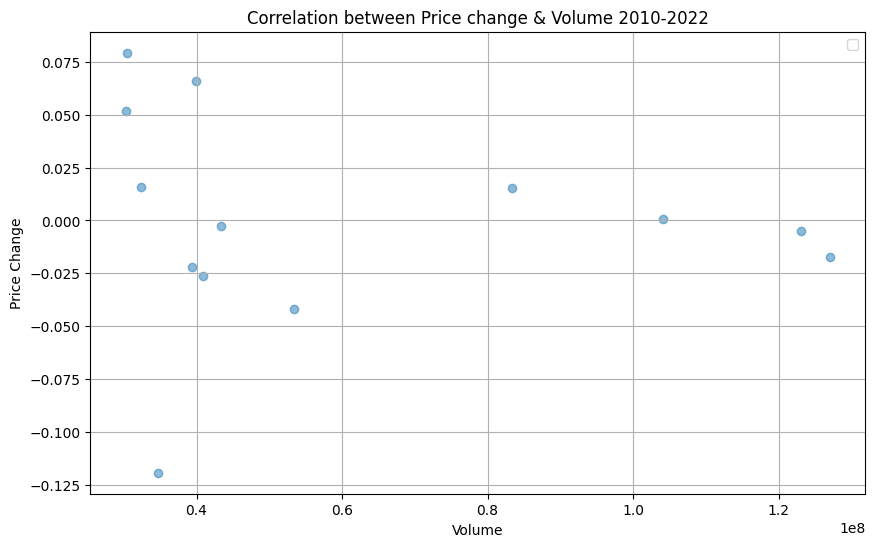

In [37]:
plt.figure(figsize=(10,6))
plt.scatter(annual_volume,price_change,alpha=0.5)
plt.xlabel("Volume")
plt.ylabel("Price Change")
plt.title("Correlation between Price change & Volume 2010-2022")
plt.legend()
plt.grid(True)
plt.show()

In [38]:
uploaded=files.upload()

Saving Google_Stock_Test (2023).csv to Google_Stock_Test (2023).csv


In [41]:
data1=pd.read_csv("Google_Stock_Test (2023).csv")

In [42]:
data1.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-03,89.589996,91.050003,88.519997,89.120003,89.120003,28131200
1,2023-01-04,90.349998,90.650002,87.269997,88.080002,88.080002,34854800
2,2023-01-05,87.470001,87.570000,85.900002,86.199997,86.199997,27194400
3,2023-01-06,86.790001,87.690002,84.860001,87.339996,87.339996,41381500
4,2023-01-09,88.360001,90.050003,87.860001,88.019997,88.019997,29003900


In [43]:
data1["Date"]=pd.to_datetime(data1["Date"])

In [45]:
#calculating SMA(100)
day=100
data1["100-day MA"]=data["Close"].rolling(window=day).mean()

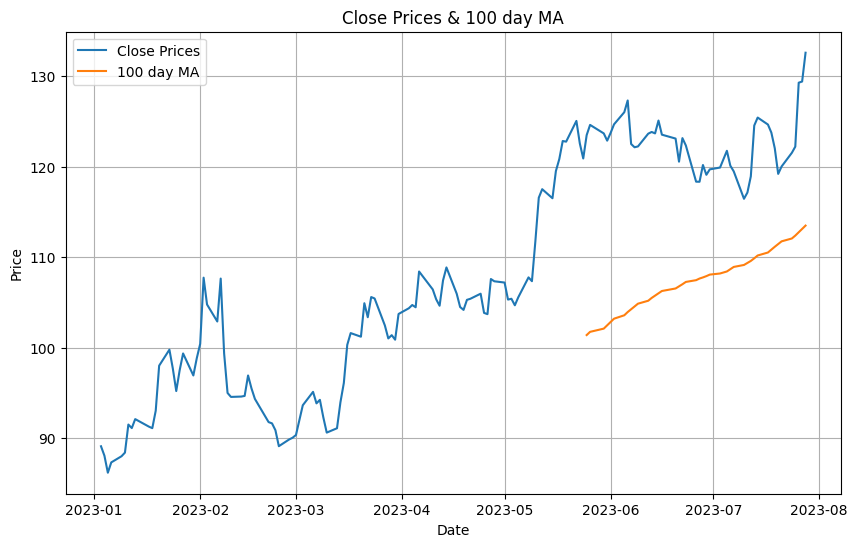

In [47]:
plt.figure(figsize=(10,6))
plt.plot(data1["Date"],data1["Close"],label="Close Prices")
plt.plot(data1["Date"],data1["100-day MA"],label="100 day MA")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Close Prices & 100 day MA")
plt.legend()
plt.grid(True)
plt.show()

In [51]:
#analysing and visualising voltaility
day1=20
data1["Price Change"]=data1["Close"]-data1["Open"]
data1["Volatility"]=data1["Price Change"].rolling(window=day1).std()

In [53]:
data1["Rolling Mean"]=data1["Close"].rolling(window=day1).mean()

In [54]:
data1["Upper"]=data1["Rolling Mean"]+2*data1["Volatility"]
data1["Lower"]=data1["Rolling Mean"]-2*data1["Volatility"]

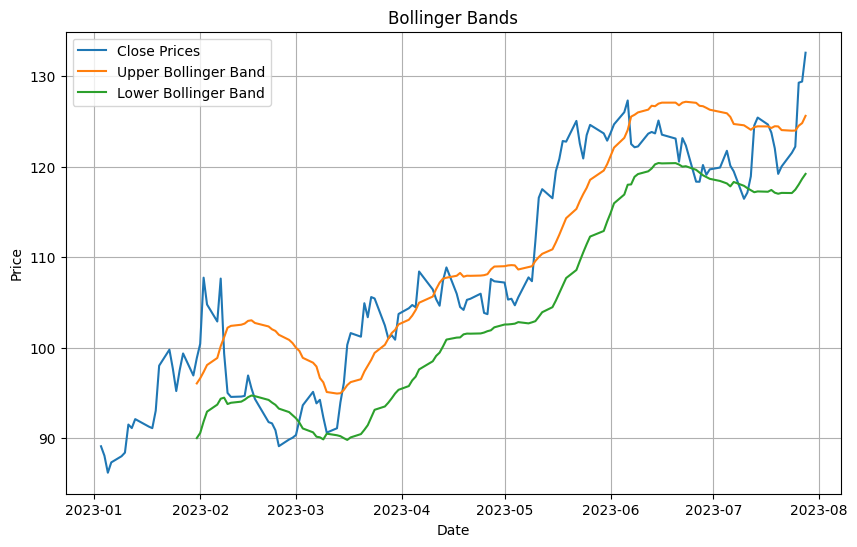

In [55]:
plt.figure(figsize=(10,6))
plt.plot(data1["Date"],data1["Close"],label="Close Prices")
plt.plot(data1["Date"],data1["Upper"],label="Upper Bollinger Band")
plt.plot(data1["Date"],data1["Lower"],label="Lower Bollinger Band")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Bollinger Bands")
plt.legend()
plt.grid(True)
plt.show()

In [79]:
uploaded=files.upload()

Saving Google_Stock_Train (2010-2022).csv to Google_Stock_Train (2010-2022) (1).csv


In [80]:

data2=pd.read_csv("Google_Stock_Train (2010-2022).csv")

In [81]:
data2["Date"]=pd.to_datetime(data2["Date"])

In [82]:
#ACF and PACF analysis
data2.set_index("Date",inplace=True)

In [83]:
model1=auto_arima(data2["Close"],seasonal=False,stepwise=True,suppress_warning=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=10064.140, Time=8.96 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10077.089, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10067.682, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10067.558, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10076.352, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=10064.212, Time=2.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=10064.111, Time=2.86 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=10063.221, Time=1.90 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=10069.420, Time=0.54 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=10069.618, Time=0.56 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=10063.125, Time=2.16 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=10066.992, Time=0.43 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=10067.104, Time=0.23 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=10064.059, Time=1.72 sec
 ARIMA(1,1,2)(0,0,0

In [84]:
p,d,q = model1.order
print(f"Optimal p value: {p}, d vale: {d}, q value: {q}")

Optimal p value: 1, d vale: 1, q value: 1


In [91]:
model=ARIMA(data2["Close"],order=(p,d,q))
results = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [93]:
#forecasting future price
forecast_steps = 3
forecast,stderr,comf_int= results.forecast(steps=forecast_steps)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [94]:
print("Forecasted Future Stock Prices:" +" "+ str(forecast))

Forecasted Future Stock Prices: 88.2466574004096


In [95]:
residuals=data2["Close"]-results.fittedvalues

ACF Plot for Residuals
PACF Plot for Residuals


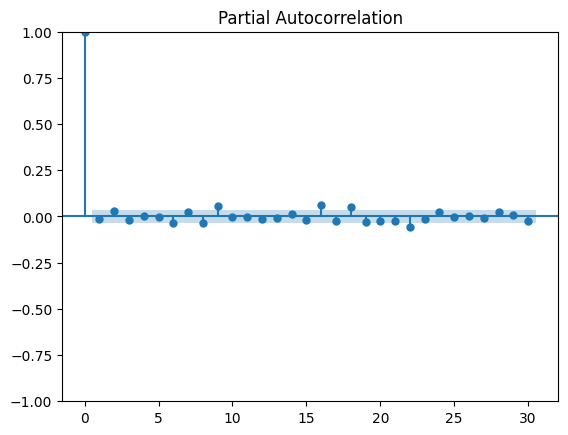

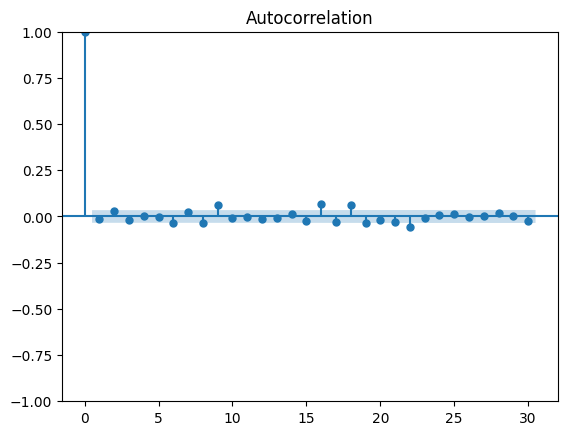

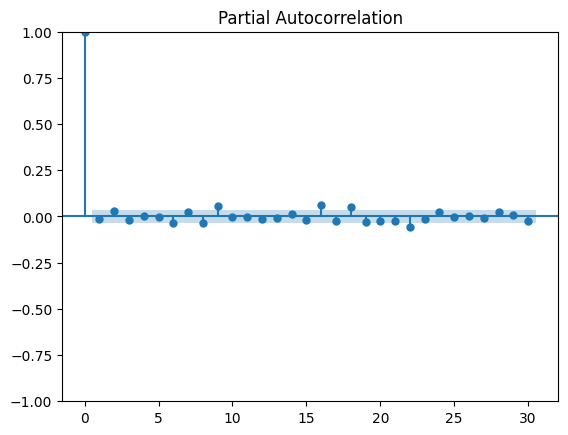

In [97]:
print("ACF Plot for Residuals")
plot_acf(residuals,lags=30)
print("PACF Plot for Residuals")
plot_pacf(residuals,lags=30)


In [98]:
#MAE MSE RMSE
actualdata=data2["Close"].iloc[-forecast_steps:]

In [101]:
mae= np.mean(np.abs(actualdata-forecast))

In [102]:
mse= np.mean((actualdata-forecast)**2)

In [106]:
rmse= np.sqrt(mse)

In [107]:
print("MAE: "+str(mae))
print("MSE: "+str(mse))
print("RMSE: "+str(rmse))

MAE: 0.8155514668031998
MSE: 1.6665469668556077
RMSE: 1.290948088365914
